# 경사하강법 (Gradient Descent)
* 볼록함수 (Convex Function)
    * 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로하는 점)에 도달할 수 있음
    * 1-D Convex Function
    * 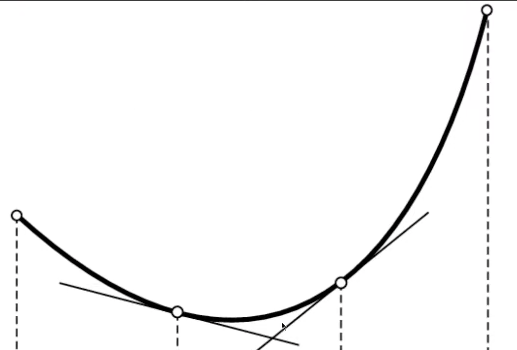
    * 2-D Convex Function
    * 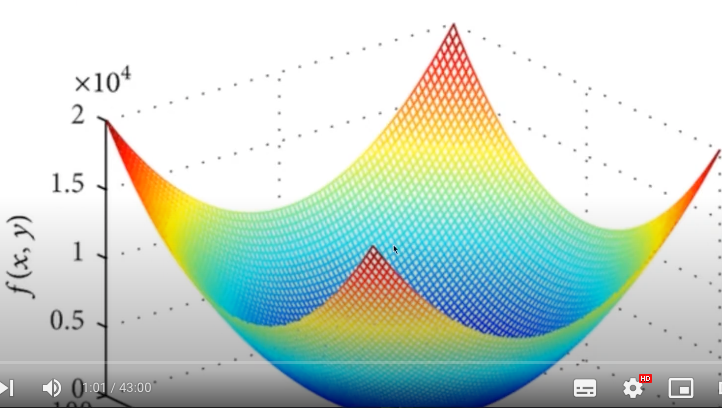

## 비볼록함수 (non-Convex Function)
* 비볼록 함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음.
* 1-D Non-Convex Function
* 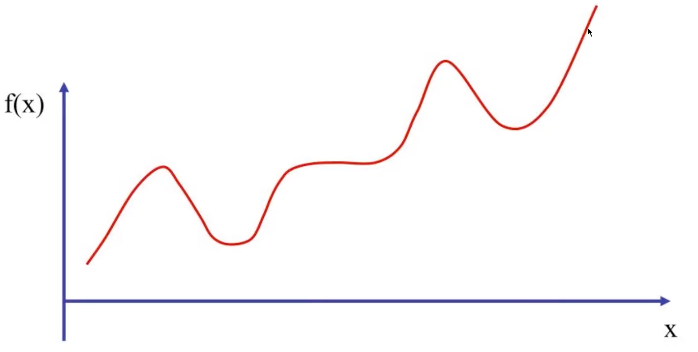
* 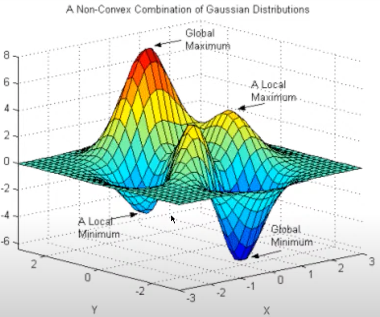

## 경사하강법
* 미분과 기울기
    * 스칼라를 백터로 미분한 것
    * 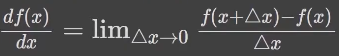
    * 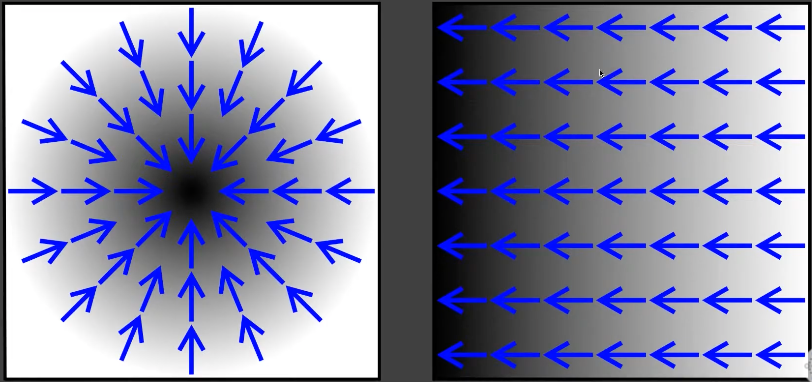
* 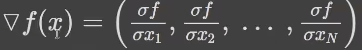
    * 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0
    * 미분값이 클수록 변화량이 크다는 의미
* 경사하강법의 과정
    * 경사하강법은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정
    * f(x)값이 변하지 않을 때까지 반복
        * 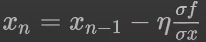
        * 
    * 즉, 미분값이 0인 지점을 찾는 방법
* 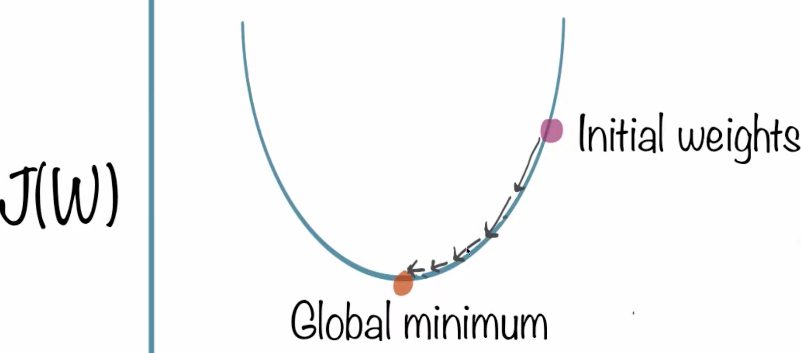
* 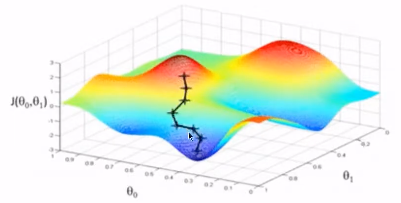

## 경사하강법 구현
* 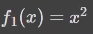

In [1]:
def f1(x):
    return x**2

def df_dx1(x):
    return 2*x


In [2]:
def gradient_descent(f,df_dx,init_x,learning_rate=0.01,epoch=100):
    x = init_x
    x_log,y_log = [x],[f(x)]
    
    for i in range(epoch):
        grad = df_dx(x)
        x -= learning_rate * grad #update된 
        
        x_log.append(x)
        y_log.append(f(x))
        
    return x_log,y_log

## 경사하강법 시각화

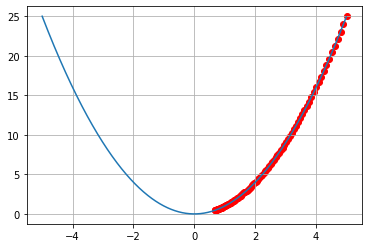

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x_init = 5

x_log,y_log = gradient_descent(f1,df_dx1,init_x=x_init)
plt.scatter(x_log,y_log,color='red')

x = np.arange(-5,5,0.01)
plt.plot(x,f1(x))
plt.grid()
plt.show()

## 비볼록함수에서의 경사하강법
* 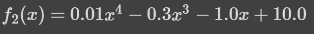

In [9]:
def f2(x):
    return 0.01*x**4 - 0.3*x**3 - 1.0*x + 10.0

def df_dx2(x):
    return 0.04*x**3 - 0.9*x**2 - 1.0

## 비볼록함수 경사하강법 시각화

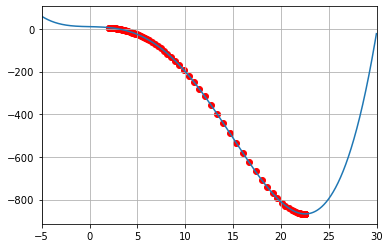

In [11]:
x_init = 2

x_log,y_log = gradient_descent(f2,df_dx2,init_x=x_init)

plt.scatter(x_log,y_log,color='red')
x = np.arange(-5,30,0.01)
plt.plot(x,f2(x))
plt.xlim(-5,30)
plt.grid()
plt.show()

## 전역 최적값 vs 지역 최적값
* 초기값이 어디냐에 따라 전체 함수의 최솟값이 될 수도 있고, 지역적 최솟값일 수 있음
* 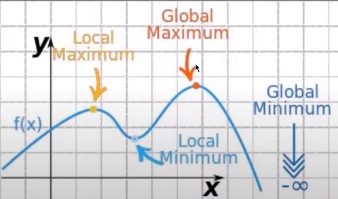
* 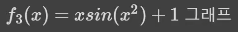

In [12]:
def f3(x):
    return x*np.sin(x**2) + 1

def df_dx3(x):
    return np.sin(x**2) + x*np.cos(x**2)*2*x

## 전역최솟값 vs 지역최솟값 시각화

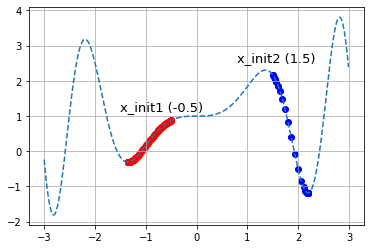

In [13]:
x_init1 = -0.5
x_log1,y_log1 = gradient_descent(f3,df_dx3,init_x=x_init1)

plt.scatter(x_log1,y_log1,color='red')

x_init2 = 1.5
x_log2,y_log2 = gradient_descent(f3,df_dx3,init_x=x_init2)
plt.scatter(x_log2,y_log2,color='blue')

x = np.arange(-3,3,0.01)
plt.plot(x,f3(x),'--')

plt.scatter(x_init1,f3(x_init1),color='red')
plt.text(x_init1-1.0,f3(x_init1)+0.3,'x_init1 ({})'.format(x_init1),fontsize=13)
plt.scatter(x_init2,f3(x_init2),color='blue')
plt.text(x_init2-0.7,f3(x_init2)+0.4,'x_init2 ({})'.format(x_init2),fontsize=13)

plt.grid()
plt.show()

## 경사하강법 구현(2)
* 경사하강을 진행하는 도중, 최솟값에 이르면 경사하강법을 종료하는 코드

In [17]:
def gradient_descent2(f,df_dx,init_x,learning_rate=0.01,epoch=100):
    eps = 1e-5
    count=0
    
    old_x = init_x
    min_x = old_x
    min_y = f(min_x)
    
    x_log,y_log = [min_x],[min_y]
    for i in range(epoch):
        grad = df_dx(old_x)
        new_x = old_x - learning_rate*grad
        new_y = f(new_x)
        
        if min_y > new_y: #새로운 gradient가 최솟값인지 확인
            min_x = new_x
            min_y = new_y
            
        if np.abs(old_x - new_x)<eps: #큰차이가 안나면 step을 멈춘다.
            break
            
            
        x_log.append(old_x)
        y_log.append(new_y)
        
        old_x = new_x
        count+=1
    
    return x_log,y_log,count
        

### 
* 각 시작점마다 경사하강법으로 내려가다가 최솟값으로 인지하는 부분에서 멈춤
* step_num(반복횟수)만큼 다 돌지 않은 경우도 발생
* 하지만 주어진 범위 내에서의 최솟값은 첫번쨰 시점일 떄이다.

count1 :  17
count2 :  100
count3 :  28


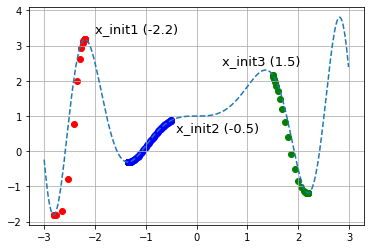

In [20]:
x_init1 = -2.2
x_log1,y_log1,count1 = gradient_descent2(f3,df_dx3,init_x=x_init1)
plt.scatter(x_log1,y_log1,color='red')
print('count1 : ',count1)

x_init2 = -0.5
x_log2,y_log2,count2 = gradient_descent2(f3,df_dx3,init_x=x_init2)
plt.scatter(x_log2,y_log2,color='blue')
print('count2 : ',count2)

x_init3 = 1.5
x_log3,y_log3,count3 = gradient_descent2(f3,df_dx3,init_x=x_init3)
plt.scatter(x_log3,y_log3,color='green')
print('count3 : ',count3)



x = np.arange(-3,3,0.01)
plt.plot(x,f3(x),'--')

plt.scatter(x_init1,f3(x_init1),color='red')
plt.text(x_init1+0.2,f3(x_init1)+0.2,'x_init1 ({})'.format(x_init1),fontsize=13)

plt.scatter(x_init2,f3(x_init2),color='blue')
plt.text(x_init2+0.1,f3(x_init2)-0.3,'x_init2 ({})'.format(x_init2),fontsize=13)

plt.scatter(x_init3,f3(x_init3),color='green')
plt.text(x_init3-1.0,f3(x_init3)+0.3,'x_init3 ({})'.format(x_init3),fontsize=13)

plt.grid()
plt.show()

## 학습률
* 학습률 값은 적절히
* 너무 크면 발산, 너무 작으면 학습이 안된다
* 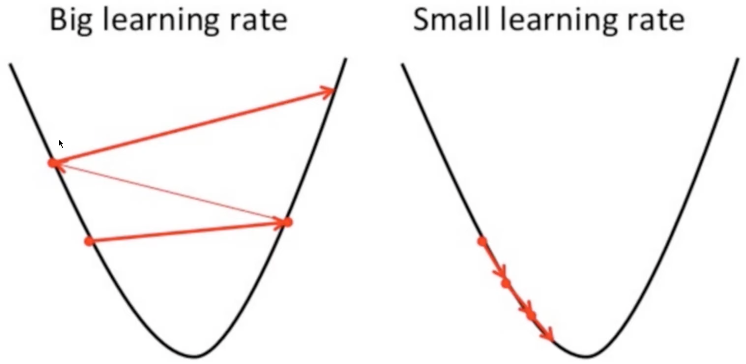

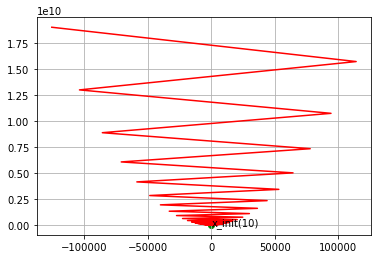

In [22]:
x_init = 10
x_log,y_log,_ = gradient_descent2(f1,df_dx1,init_x=x_init,learning_rate=1.05)
plt.plot(x_log,y_log,color='red')

plt.scatter(x_init,f1(x_init),color='green')
plt.text(x_init-2.2,f1(x_init)-2,'x_init({})'.format(x_init),fontsize=10)

x  = np.arange(-50,30,0.01)
plt.plot(x,f1(x),'--')

plt.grid()
plt.show()

# 위로 발산하는 모습

## 학습률별 경사하강법

init value = 0.001, count = 100
init value = 0.01, count = 100
init value = 0.1, count = 60
init value = 1.01, count = 100


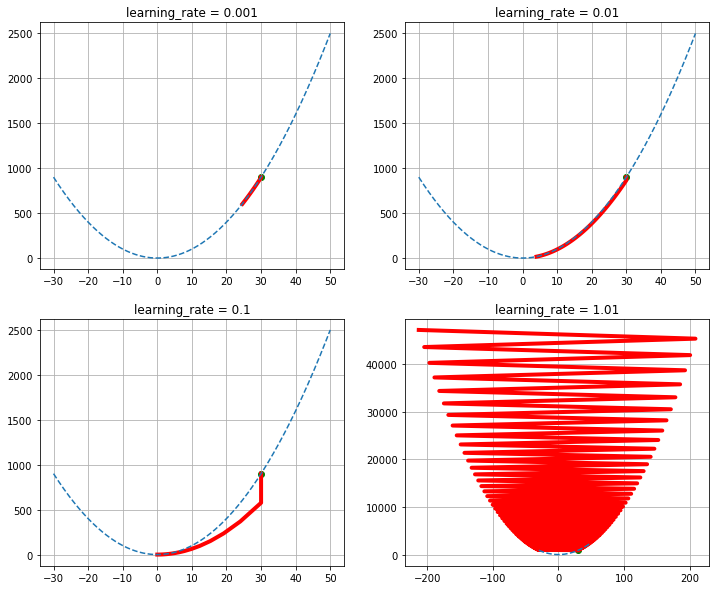

In [24]:
lr_list = [0.001,0.01,0.1,1.01]

x_init = 30.0
x = np.arange(-30,50,0.01)

fig = plt.figure(figsize=(12,10))

for i,lr in enumerate(lr_list):
    x_log,y_log,count = gradient_descent2(f1,df_dx1,init_x=x_init,learning_rate=lr)
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(init_x,f1(init_x),color='green')
    ax.plot(x_log,y_log,color='red',linewidth='4')
    ax.plot(x,f1(x),'--')
    ax.grid()
    ax.title.set_text('learning_rate = {}'.format(str(lr)))
    print('init value = {}, count = {}'.format(str(lr),str(count)))

## 안장점 (saddle point)
* 기울기가 0이지만 극값이 되지 않음
* 경사하강법은 안장점에서 벗어나지 못함
* 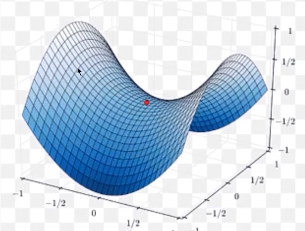

### 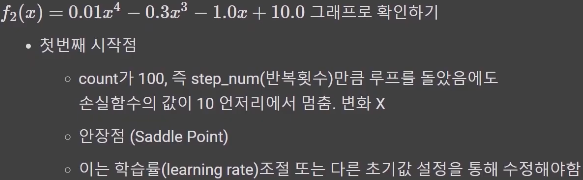

count1 :  100
count2 :  82
count3 :  50


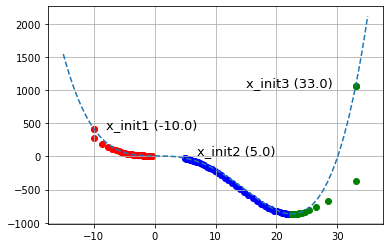

In [26]:
x_init1 = -10.0
x_log1,y_log1,count1 = gradient_descent2(f2,df_dx2,init_x=x_init1)
plt.scatter(x_log1,y_log1,color='red')
print('count1 : ',count1)

x_init2 = 5.0
x_log2,y_log2,count2 = gradient_descent2(f2,df_dx2,init_x=x_init2)
plt.scatter(x_log2,y_log2,color='blue')
print('count2 : ',count2)

x_init3 = 33.0
x_log3,y_log3,count3 = gradient_descent2(f2,df_dx2,init_x=x_init3)
plt.scatter(x_log3,y_log3,color='green')
print('count3 : ',count3)



x = np.arange(-15,35,0.01)
plt.plot(x,f2(x),'--')

plt.scatter(x_init1,f2(x_init1),color='red')
plt.text(x_init1+2,f2(x_init1),'x_init1 ({})'.format(x_init1),fontsize=13)

plt.scatter(x_init2,f2(x_init2),color='blue')
plt.text(x_init2+2,f2(x_init2)+53,'x_init2 ({})'.format(x_init2),fontsize=13)

plt.scatter(x_init3,f2(x_init3),color='green')
plt.text(x_init3-18,f2(x_init3),'x_init3 ({})'.format(x_init3),fontsize=13)

plt.grid()
plt.show()

### 

count1 :  17
count2 :  100


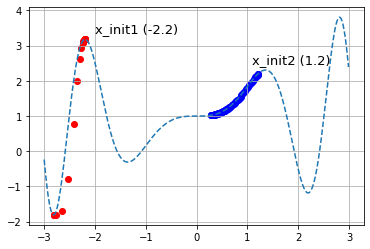

In [27]:
x_init1 = -2.2
x_log1,y_log1,count1 = gradient_descent2(f3,df_dx3,init_x=x_init1)
plt.scatter(x_log1,y_log1,color='red')
print('count1 : ',count1)

x_init2 = 1.2
x_log2,y_log2,count2 = gradient_descent2(f3,df_dx3,init_x=x_init2)
plt.scatter(x_log2,y_log2,color='blue')
print('count2 : ',count2)


x = np.arange(-3,3,0.01)
plt.plot(x,f3(x),'--')

plt.scatter(x_init1,f3(x_init1),color='red')
plt.text(x_init1+0.2,f3(x_init1)+0.2,'x_init1 ({})'.format(x_init1),fontsize=13)

plt.scatter(x_init2,f3(x_init2),color='blue')
plt.text(x_init2-0.1,f3(x_init2)+0.3,'x_init2 ({})'.format(x_init2),fontsize=13)


plt.grid()
plt.show()